# Chapter 8: Neural Networks
## Training a Classifier on the *Salammbô* Dataset with Keras


Programs from the book: [_Python for Natural Language Processing_](https://link.springer.com/book/9783031575488)

__Author__: Pierre Nugues

## Modules

We first need to import some modules

In [1]:
import numpy as np

In [2]:
import keras
import os
os.environ["KERAS_BACKEND"] = 'torch'

In [3]:
keras.__version__

'3.3.3'

### Reading the dataset
We can read the data from a file with the svmlight format or directly create numpy arrays

In [4]:
X = np.array(
    [[35680, 2217], [42514, 2761], [15162, 990], [35298, 2274],
     [29800, 1865], [40255, 2606], [74532, 4805], [37464, 2396],
     [31030, 1993], [24843, 1627], [36172, 2375], [39552, 2560],
     [72545, 4597], [75352, 4871], [18031, 1119], [36961, 2503],
     [43621, 2992], [15694, 1042], [36231, 2487], [29945, 2014],
     [40588, 2805], [75255, 5062], [37709, 2643], [30899, 2126],
     [25486, 1784], [37497, 2641], [40398, 2766], [74105, 5047],
     [76725, 5312], [18317, 1215]
     ])

y = np.array(
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Scaling the Data
Scaling and normalizing are usually very significant with neural networks. We use sklean transformers. They consist of two main methods: `fit()` and `transform()`.

### Normalizing

In [5]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
X_norm = normalizer.fit_transform(X)
X_norm[:4]

array([[0.99807515, 0.06201605],
       [0.99789783, 0.06480679],
       [0.99787509, 0.06515607],
       [0.99793128, 0.06428964]])

### Standardizing

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
X_scaled = scaler.fit_transform(X_norm)
X_scaled[:4]

array([[ 1.68336574, -1.7197772 ],
       [ 0.57376529, -0.56145427],
       [ 0.43143908, -0.41648279],
       [ 0.78308579, -0.77610221]])

## Creating a Model

We set a seed to have reproducible results

In [7]:
np.random.seed(1337)

We create a classifier equivalent to a logistic regression 

In [8]:
model = keras.Sequential([
    keras.layers.Dense(1, activation='sigmoid')
])

Or with one hidden layer

In [9]:
model2 = keras.Sequential([
    keras.layers.Dense(5, activation='relu'),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

To try the network with one hidden layer, set `simple` to false

In [10]:
simple = True
if not simple:
    model = model2

## Fitting the Model

We compile and fit the model

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [12]:
history = model.fit(X_scaled, y, epochs=20, batch_size=1)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.0509 - loss: 1.0892    
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - accuracy: 0.0229 - loss: 0.9009  
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - accuracy: 0.0054 - loss: 0.7556  
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step - accuracy: 0.9491 - loss: 0.6513
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 196us/step - accuracy: 1.0000 - loss: 0.5592
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step - accuracy: 0.9577 - loss: 0.4971
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step - accuracy: 0.9771 - loss: 0.4234
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step - accuracy: 0.9978 - loss: 0.3967
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step - accuracy: 1.0000 - loss: 0.4194
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.9876 - loss: 0.3561
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - accuracy: 0.9845 - loss: 0.3049
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 19

In [13]:
history.history['loss'], history.history['accuracy']

([1.0887080430984497,
  0.8902492523193359,
  0.7397945523262024,
  0.62823486328125,
  0.5450403690338135,
  0.4822029173374176,
  0.43376752734184265,
  0.39561519026756287,
  0.3649318516254425,
  0.33978182077407837,
  0.31875574588775635,
  0.300860196352005,
  0.28552189469337463,
  0.2722107768058777,
  0.2605226933956146,
  0.2501806914806366,
  0.240936279296875,
  0.23262223601341248,
  0.2251262366771698,
  0.21830616891384125],
 [0.03333333507180214,
  0.03333333507180214,
  0.06666667014360428,
  0.9666666388511658,
  1.0,
  0.9666666388511658,
  0.9666666388511658,
  0.9666666388511658,
  1.0,
  0.9666666388511658,
  0.9666666388511658,
  1.0,
  0.9666666388511658,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9666666388511658,
  1.0])

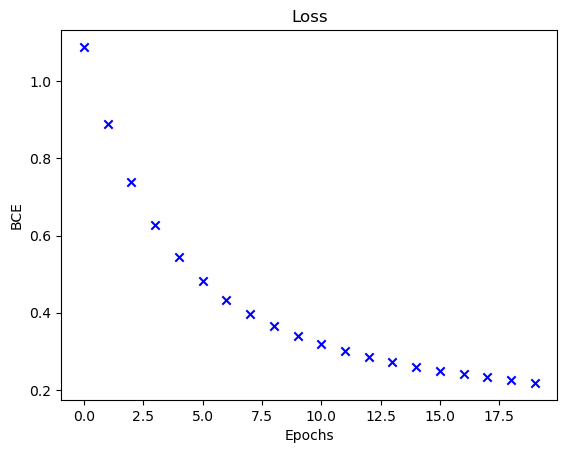

In [14]:
import matplotlib.pyplot as plt

plt.scatter(range(len(history.history['loss'])),
            history.history['loss'], c='b', marker='x')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('BCE')
plt.show()

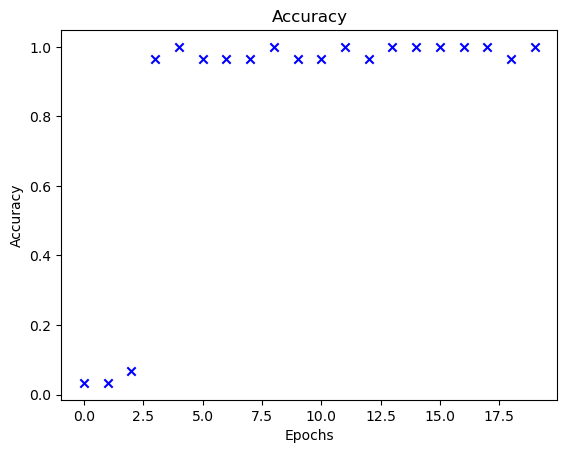

In [15]:
plt.scatter(range(len(history.history['accuracy'])),
            history.history['accuracy'], c='b', marker='x')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Prediction
### Probabilities

We compute the probabilities to belong to class 1 for all the training set

In [16]:
y_pred_proba = model.predict(X_scaled)
y_pred_proba

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[0.0310751 ],
       [0.24167898],
       [0.2989525 ],
       [0.17177424],
       [0.04407746],
       [0.2118542 ],
       [0.17723843],
       [0.1236777 ],
       [0.15015212],
       [0.3342191 ],
       [0.36583984],
       [0.210152  ],
       [0.08026473],
       [0.19918266],
       [0.02928117],
       [0.76484835],
       [0.8719775 ],
       [0.5160815 ],
       [0.87684697],
       [0.68744355],
       [0.91379446],
       [0.6888898 ],
       [0.9609233 ],
       [0.89099765],
       [0.9579006 ],
       [0.97063845],
       [0.85992074],
       [0.81853944],
       [0.921866  ],
       [0.5029122 ]], dtype=float32)

### Classes

In [17]:
def predict_class(y_pred_proba):
    y_pred = np.zeros(y_pred_proba.shape[0])
    for i in range(y_pred_proba.shape[0]):
        if y_pred_proba[i][0] >= 0.5:
            y_pred[i] = 1
    return y_pred

In [18]:
y_pred = predict_class(y_pred_proba)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Evaluation

With Keras

In [19]:
scores = model.evaluate(X_scaled, y)
scores

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.2147


[0.21473366022109985, 1.0]

With sklearn

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



We computed the accuracy from the training set. This is not a good practice. We should use a dedicated test set instead.

## The weights

In [21]:
model.get_weights()

[array([[-1.1037982],
        [ 0.9250516]], dtype=float32),
 array([0.00919863], dtype=float32)]

We recompute the results with matrices

In [22]:
if simple:
    print(keras.activations.sigmoid((X_scaled@model.get_weights()
          [0] + model.get_weights()[1]))[:4])
else:
    print(keras.activations.sigmoid((keras.activations.relu(X_scaled@model.get_weights()
          [0] + model.get_weights()[1]))@model.get_weights()[2] + model.get_weights()[3])[:4])

tf.Tensor(
[[0.03107511]
 [0.24167895]
 [0.29895247]
 [0.17177425]], shape=(4, 1), dtype=float64)
